In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
lookback = 5

In [3]:
extract_obj = yf.Ticker("TATASTEEL.NS")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [4]:
#price_list - numpy array list
#lookback - integer
def linreg(price_array, lookback):
    n = lookback
    out_array = np.array([None for i in range(n)])
    
    for i in range(n,price_array.size):
        price_arr = price_array[i - n: i]
        sum_xy = 0
        sum_y = 0
        sum_x = n*(n+1)/2
        sum_x2 = n*(n+1)*(2*n+1)/6
        for i,j in enumerate(price_arr):
            sum_y += j
            sum_xy += (i+1)*j 
        b = (n*sum_xy - (sum_x*sum_y))/((n*sum_x2) - (sum_x*sum_x))
        out_array = np.append(out_array,b)    
    
    return out_array


In [5]:
start = time.time()
x1 = linreg(price_list,lookback)
end = time.time()
print(x1)
function_time = end - start

[None None None None None -4.69 -1.5700000000001455 2.657999999999738
 -1.6179999999998835 -5.507999999999884 -4.54 2.719000000000233
 9.12699999999997 3.0100000000001454 -3.233000000000029 0.7969999999999708
 15.340999999999912 27.569999999999855 32.53299999999988 26.48899999999994
 19.616000000000057 15.020999999999766 14.976999999999826
 13.872000000000117 1.9979999999998836 -6.547000000000116 -7.89 1.75 6.64
 3.405 4.220999999999767 9.697999999999883 15.303999999999942
 17.210000000000292 14.942999999999884 21.081999999999827 22.935
 22.423999999999943 22.609000000000233 13.957999999999883
 13.420999999999767 25.62500000000029 39.119000000000234 42.51799999999989
 26.201999999999824 -6.679999999999709 -23.003000000000466 -14.11
 -1.7909999999997672 -2.9379999999998834]


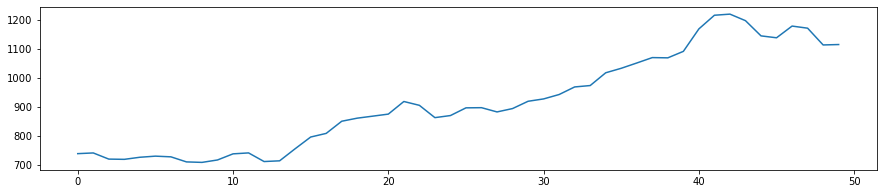

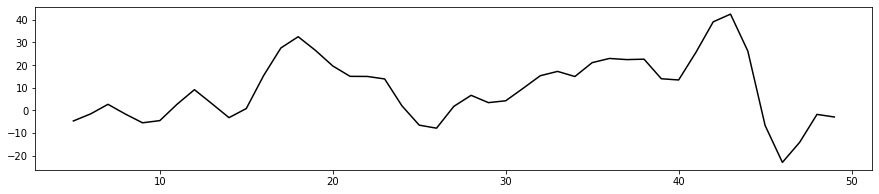

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()

In [7]:
def signal_generation(linreg_array, lookback):
    out_array = np.array([0 for i in range(lookback + 1)])
    start_val = lookback + 1
    for i in range(start_val, linreg_array.size):
        append_val = 0
        if (linreg_array[i] > 0 and linreg_array[i - 1]  <= 0):
            append_val = linreg_array[i] - linreg_array[i - 1]
        elif (linreg_array[i] < 0 and linreg_array[i - 1]  >= 0):
            append_val = linreg_array[i] - linreg_array[i - 1]
        out_array = np.append(out_array, append_val)
    return out_array

In [8]:
start = time.time()
sign_gen = signal_generation(linreg_array = x1, lookback = lookback)
end = time.time()
print(sign_gen)
signal_time = end - start

[  0.      0.      0.      0.      0.      0.      0.      4.228  -4.276
   0.      0.      7.259   0.      0.     -6.243   4.03    0.      0.
   0.      0.      0.      0.      0.      0.      0.     -8.545   0.
   9.64    0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      0.      0.
 -32.882   0.      0.      0.      0.   ]


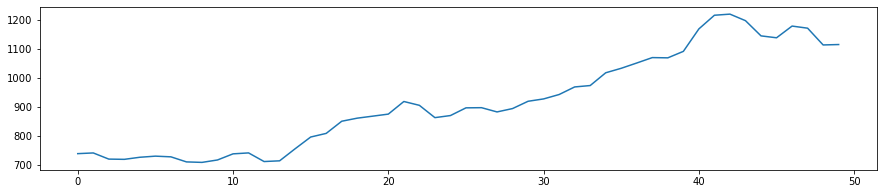

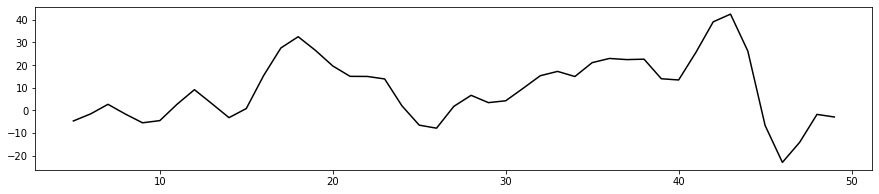

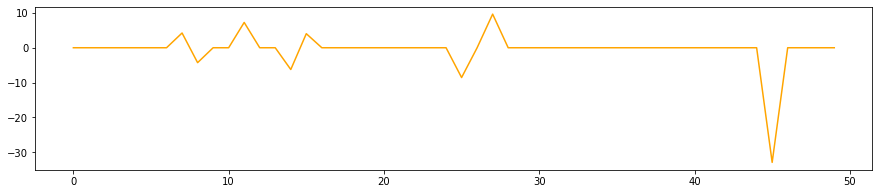

In [9]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

plt.show()

In [10]:
def signum_generation(signal_array, sensitivity = 1):
    out_arr = np.empty(0)
    std = np.std(signal_array)
    for i in signal_array:
        append_val = 0
        if (i > std*sensitivity):
            append_val = 100
        elif (i < -std*sensitivity):
            append_val = -100
        out_arr = np.append(out_arr, append_val)
    return out_arr

In [11]:
start = time.time()
signum_gen = signum_generation(sign_gen)
end = time.time()
print(signum_gen)
signum_time = end - start

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  100.
    0.    0. -100.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0. -100.    0.  100.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0. -100.    0.    0.
    0.    0.]


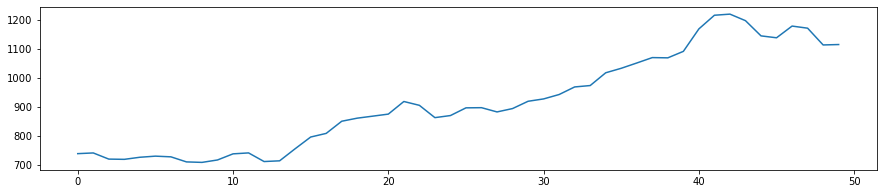

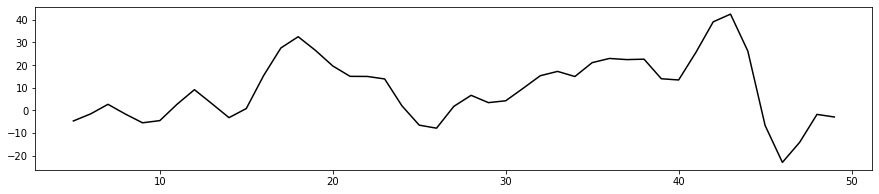

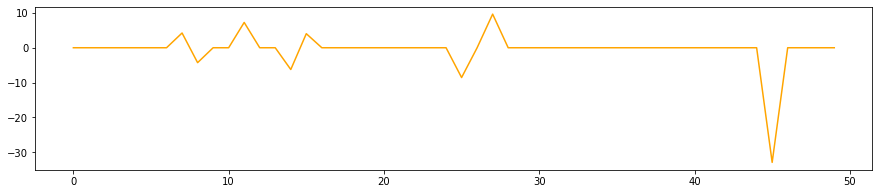

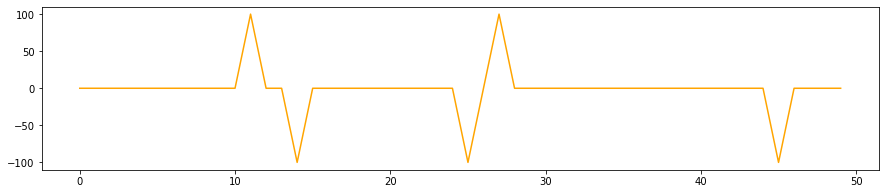

In [12]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

plt.show()

In [13]:
def current_bias(signal_array, signum_array):
    bias = 0
    bias_list = []
    for i,j in zip(signal_array,signum_array):
        if (bias == 0):
            if (j == 100):
                bias = 100
            elif(j == -100):
                bias = -100
        elif(bias == -100):
            if (j == 100 and i > 0):
                bias = 100
            elif(j != 100 and i > 0):
                bias = 0
        elif(bias == 100):
            if (j == -100 and i < 0):
                bias = -100
            elif (j != -100 and i < 0):
                bias = 0
        bias_list.append(bias)
    bias_array = np.array(bias_list)
    return bias_array

In [14]:
start = time.time()
bias_array = current_bias(signal_array = sign_gen, signum_array = signum_gen)
end = time.time()
bias_time = end - start
print(bias_array)

[   0    0    0    0    0    0    0    0    0    0    0  100  100  100
 -100    0    0    0    0    0    0    0    0    0    0 -100 -100  100
  100  100  100  100  100  100  100  100  100  100  100  100  100  100
  100  100  100 -100 -100 -100 -100 -100]


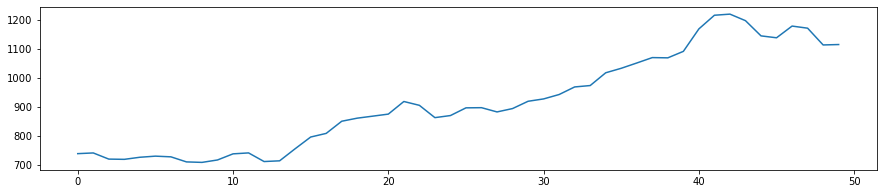

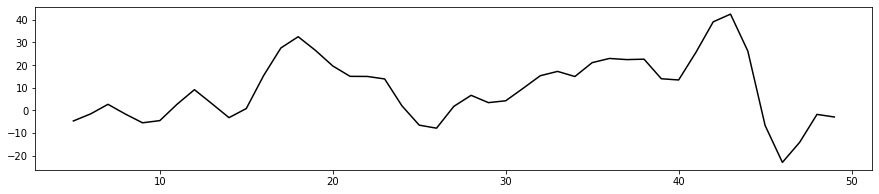

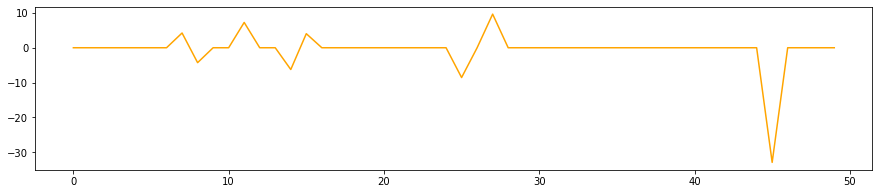

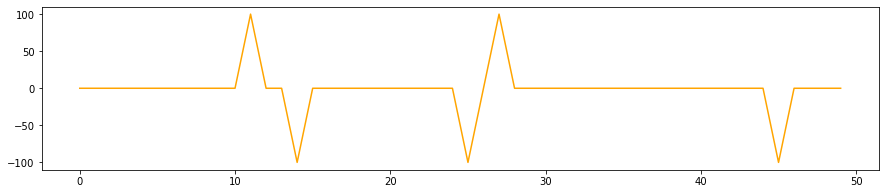

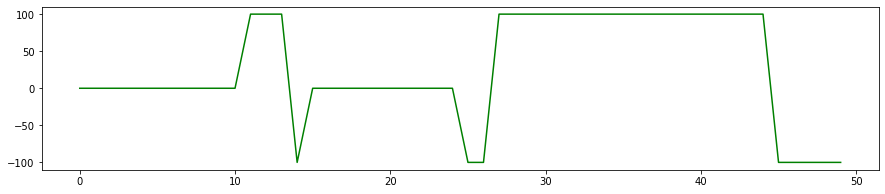

In [15]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

plt.show()

In [16]:
def efficacy_generator (price_array,signum_array, bias_array, stop_loss_percent = 0.3):
    long_book = [0 for i in range(price_array.size)]
    short_book = [0 for i in range(price_array.size)]
    long_pos = []
    short_pos = []
    long_positions = []
    short_positions = []
    long_cash = 0
    short_cash = 0
    stop_loss_flag = False
    short_position_flag = False
    long_position_flag = False
    sub_stop = (max(price_array) - min(price_array))*stop_loss_percent
    
    ctr = 0
    for i,j,k in zip(price_array, bias_array,signum_array):
        if (stop_loss_flag):
            if(k == 100 or k == -100):
                stop_loss_flag = False                 
        elif (stop_loss_flag == False  and short_position_flag == False and long_position_flag == False):
            if(j == 100):
                long_position_flag = True
                long_pos.append(i)
                long_book[ctr] = i
            elif(j == -100):
                short_position_flag = True
                short_pos.append(i)
                short_book[ctr] = i
        elif(stop_loss_flag == False  and short_position_flag == True):
            short_pos.append(i)
            short_book[ctr] = i
            if (i > (min(short_pos) + sub_stop)):
                short_position_flag = False
                stop_loss_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 100):
                short_position_flag = False
                long_position_flag = True
                short_positions.append(short_pos)
                short_pos = []
            elif(j == 0):
                short_position_flag = False
                short_positions.append(short_pos)
                short_pos = []
        elif(stop_loss_flag == False and long_position_flag == True):
            long_pos.append(i)
            long_book[ctr] = i
            if (i < (max(long_pos) - sub_stop)):
                long_position_flag = False
                stop_loss_flag = True
                long_positions.append(long_pos)
                long_pos = []
            elif (j == 0):
                long_position_flag = False
                long_positions.append(long_pos)
                long_pos = []
            elif(j == -100):
                long_position_flag = False
                short_position_flag = True
                long_positions.append(long_pos)
                long_pos = []
                
        ctr += 1
        
    if (long_pos != []):
        long_positions.append(long_pos)
    if (short_pos != []):
        short_positions.append(short_pos)
    
    for i in long_positions:
        long_cash += (i[-1] - i[0])
    for i in short_positions:
        short_cash += (i[0] - i[-1])
    
    out = (long_cash+short_cash)/sub_stop
    print(out)
    return long_book,short_book

In [17]:
start = time.time()
test = efficacy_generator(price_array = price_list, signum_array = signum_gen, bias_array = bias_array)
end = time.time()
efficacy_time = end - start
print(test)

2.1920627143557074
([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 741.3, 711.58, 714.07, 755.65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 893.92, 919.03, 927.12, 942.27, 968.35, 973.13, 1017.1, 1032.57, 1050.75, 1069.35, 1068.5, 1090.8, 1168.15, 1215.12, 1218.93, 1196.42, 1144.1, 1137.52, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 795.97, 0, 0, 0, 0, 0, 0, 0, 0, 0, 896.4, 896.97, 882.35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1177.83, 1170.6, 1112.87, 1114.28])


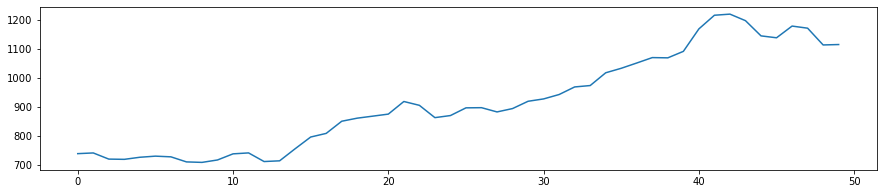

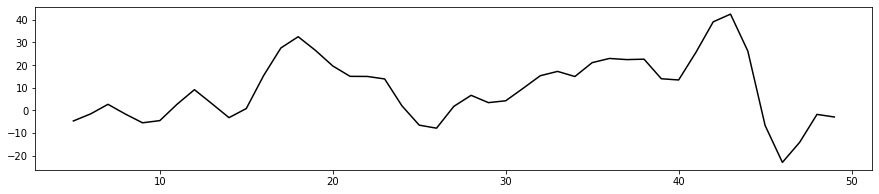

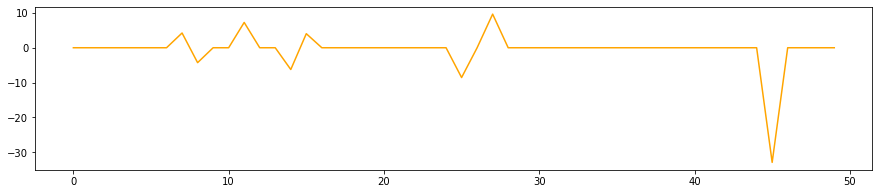

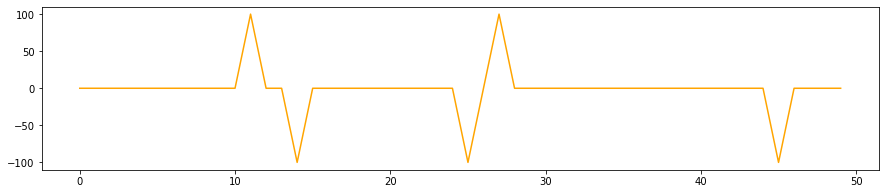

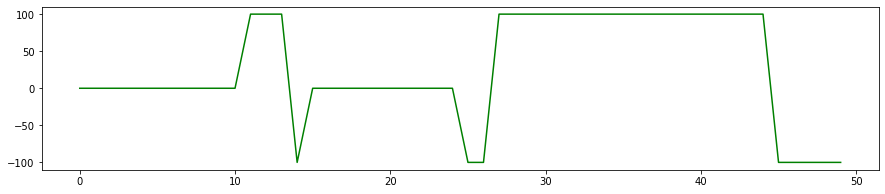

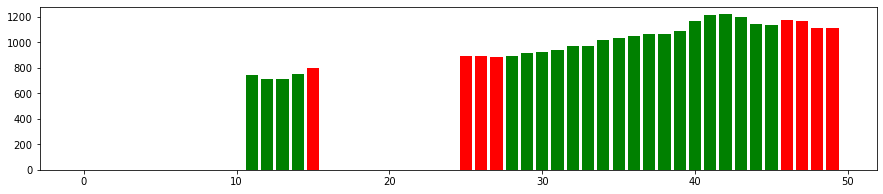

In [18]:
figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')

figure(figsize=(plot_width, plot_length))
ax3 = plt.subplot()
plt.plot(np.arange(sign_gen.size), sign_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax4 = plt.subplot()
plt.plot(np.arange(signum_gen.size), signum_gen, color = 'orange')

figure(figsize=(plot_width, plot_length))
ax5 = plt.subplot()
plt.plot(np.arange(bias_array.size), bias_array, color = 'green')

figure(figsize=(plot_width, plot_length))
ax6 = plt.subplot()
plt.bar(np.arange(bias_array.size), test[0], color = 'green')
plt.bar(np.arange(bias_array.size), test[1], color = 'red')

plt.show()

In [19]:
print(
    "Diagnostics \n" +
    "Function Load Time: " + str(function_time) + "\n" + 
    "Signal Load Time: " + str(signal_time) + "\n" + 
    "Signum Load Time: " + str(signum_time) + "\n" 
    "Bias Load Time: " + str(bias_time) + "\n" + 
    "Efficacy Value Load time: " + str(efficacy_time) + "\n"
    "Total Time: " + str(function_time+signal_time+signum_time+bias_time+efficacy_time)
    )

Diagnostics 
Function Load Time: 0.0029931068420410156
Signal Load Time: 0.0030002593994140625
Signum Load Time: 0.0029964447021484375
Bias Load Time: 0.0
Efficacy Value Load time: 0.001996278762817383
Total Time: 0.010986089706420898
